In [1]:
# Importing Libraries
import pandas as pd
import preprocess
import numpy as np

Conda deactivate
Streamlit run streamlit_app.py 


In [2]:

# Read in labeled stock sentiment data
data = pd.read_csv('train/stock_data.csv')

# Preprocess tweets for NLP analysis
data = preprocess.Preprocess_Tweets(data)
display(data)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\strings\object_array.py:158: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


,Text,Sentiment,Text_Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...


In [3]:
#import nltk
#nltk.download('vader_lexicon')

In [4]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Prepare Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

Vedar Model Accuracy

In [5]:

# Predict sentiment with Vader classifier
data['Vader_Scores'] = data['Text_Cleaned'].apply(lambda score: sid.polarity_scores(score)['compound'])
data['Vader_Prediction'] = data['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy:', round((len(data[data['Sentiment']==data['Vader_Prediction']])/len(data)) *100, 2), '%', '\n')

Vader Accuracy: 66.48 % 



In [6]:
display(data)

,Text,Sentiment,Text_Cleaned,Vader_Scores,Vader_Prediction
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,0.0000,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...,0.6249,1
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...,0.3612,1
3,MNTA Over 12.00,1,mnta over 12.00,0.0000,1
4,OI Over 21.37,1,oi over 21.37,0.0000,1
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...,-0.7003,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...,0.0258,1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...,0.0000,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...,0.0000,1


Visualizing the Accuracy of Vedar Model

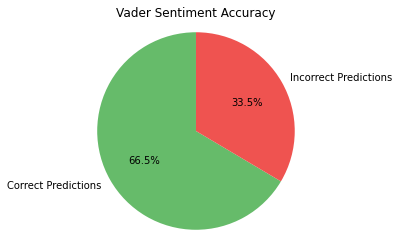

In [7]:

# Plot Vader sentiment accuracy
import matplotlib.pyplot as plt
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [len(data[data['Sentiment'] == data['Vader_Prediction']]), len(data[data['Sentiment'] != data['Vader_Prediction']])]
colors = ['#66BB6A', '#EF5350']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vader Sentiment Accuracy')
plt.show()

In [8]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Print the list of stopwords for the English language
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords

In [10]:
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords

# Create list of custom stop words to remove
StopWords = set([s.replace("'", '') for s in stopwords.words('english') if s not in ['not', 'up', 'down', 'above', 'below', 'under', 'over']])
print(StopWords)

# Remove stop words for tweets
data['Text_Processed'] = data['Text_Cleaned'].apply(lambda s: " ".join([word for word in s.split() if word not in StopWords]))
data['Text_Processed'] = data['Text_Processed'].str.strip()

display(data)

{'them', 'these', 'such', 'just', 'youre', 'hadnt', 'wouldnt', 'wouldn', 'out', 'if', 'thatll', 'mightn', 'isn', 'should', 'in', 'who', 'theirs', 'couldnt', 'more', 't', 'me', 'youd', 'before', 'has', 'his', 'did', 'where', 'hers', 'it', 'were', 'for', 'don', 'be', 'on', 'as', 'while', 'most', 've', 'doesnt', 'ourselves', 'and', 'he', 'off', 'with', 'some', 'nor', 'here', 'doing', 'of', 're', 'didnt', 'havent', 'an', 'your', 'a', 'was', 'too', 'they', 'we', 'werent', 'now', 'wont', 'her', 'when', 'having', 'myself', 'both', 'which', 'shant', 'all', 'mustnt', 'again', 'had', 'are', 'shouldve', 'have', 'hadn', 'any', 'between', 'yours', 'themselves', 'him', 'i', 'mightnt', 'y', 'being', 'own', 'haven', 'neednt', 'himself', 'do', 'mustn', 'than', 'through', 'she', 'arent', 'its', 'itself', 'herself', 'youll', 'about', 'shes', 'shouldn', 'wasnt', 'whom', 'aren', 'very', 'against', 'once', 'ma', 'can', 'that', 'there', 'dont', 'but', 'so', 'o', 'is', 'our', 'how', 'been', 'because', 'into',

,Text,Sentiment,Text_Cleaned,Vader_Scores,Vader_Prediction,Text_Processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,0.0000,1,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...,0.6249,1,aap movie 55 percent return fea geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...,0.3612,1,id afraid short amzn looking like near monopol...
3,MNTA Over 12.00,1,mnta over 12.00,0.0000,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37,0.0000,1,oi over 21.37
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...,-0.7003,-1,industry body cii said likely suffer net reven...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...,0.0258,1,prices slip below rs 46000 book profits amid l...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...,0.0000,1,workers bajaj auto agreed 10 percent wage cut ...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...,0.0000,1,live sensex day’s high up 600 points tests 920...


Importing Libraries for Naive Bayes Model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score #for model accuracy
from sklearn.naive_bayes import MultinomialNB #Model
import matplotlib.pyplot as plt


Splitting Data into Training and Test Data

In [12]:
# Split data into 80/20 train-test split
train_pct = .8
np.random.seed(1)  #ets the seed value for the random number generator
idx = np.random.permutation(len(data)) #randomize data

Model Fitting and Training

In [13]:
X_train = data['Text_Processed'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]

y_train[y_train==-1] = 0 #Naive Bayes output values as 0 and 1, and write now we have 1 and -1

X_test = data['Text_Processed'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]
y_test[y_test==-1] = 0  #Naive Bayes output values as 0 and 1, and write now we have 1 and -1


In [14]:
print(X_train.shape, y_train.shape )
print(X_test.shape, y_test.shape )

(4632,) (4632,)
(1159,) (1159,)


Calculate TF-IDF for Naive Bayes classification

In [15]:
#Initilize Vectorizer

tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)

# Get TF-IDF for Train and Test data
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)


Model Accuracy

In [16]:
# Define function to determine accuracy of model
def get_auc_CV(model):
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

# Initialize models with multiple alpha values to find best model
#Alpha Values for different mdoels
alphas = np.arange(1,10,0.1)
models = [MultinomialNB(alpha=i) for i in alphas]

# Find best performing model
accs = []
for model in models:
    accs.append(get_auc_CV(model))
    
accs = np.array(accs)

# Get best performing alpha value to continue with
best_alpha = round(alphas[accs.argmax()], 1)

# Print best alpha value and accuracy
print('Best alpha: ', best_alpha, '  |  Best Score: ', round(accs.max()*100, 2))

Best alpha:  1.0   |  Best Score:  83.04


Visualizing the Model Accuracy

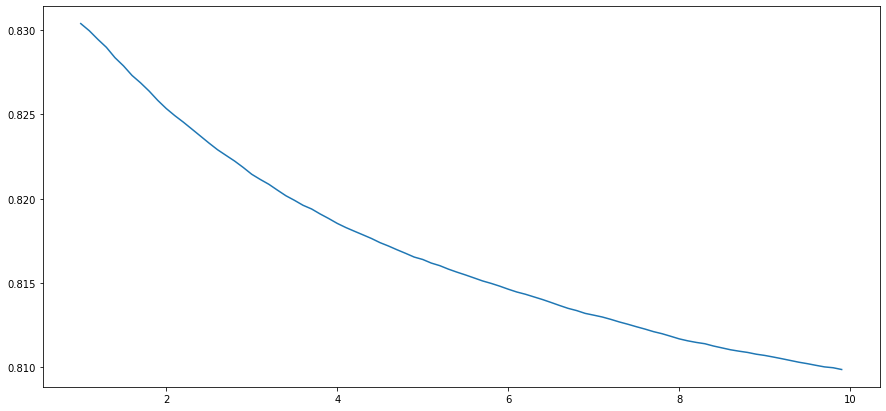

In [17]:
# Plot accuracies per alpha values
plt.figure(figsize=(15,7))
plt.plot(alphas, accs)
plt.show()

In [18]:
# Retrain best performing model
best_model = MultinomialNB(alpha=best_alpha)
best_model.fit(X_train_tfidf, y_train)

# Predict test data with best model
probs = best_model.predict_proba(X_test_tfidf)

Accuracy of Best Model on Sentiment Analysis of tweets

In [19]:
# Print accuracy of best performing model on tweet sentiment analysis 
print('Naive-Bayes Accuracy:', round(len(np.where(y_test == probs.argmax(axis=1))[0])/len(probs) * 100, 2), '%')

Naive-Bayes Accuracy: 66.78 %


Visualizing the Accuracy of Naive Bayes Model

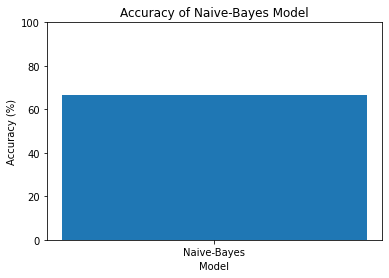

In [20]:
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = round(len(np.where(y_test == probs.argmax(axis=1))[0]) / len(probs) * 100, 2)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Naive-Bayes'], [accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Naive-Bayes Model')
plt.ylim(0, 100)
plt.show()
